# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city +"&appid="+ weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san mateo del mar
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | poum
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | lasa
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | fonte boa
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | alekseyevka
Processing Record 21 of Set 1 | kimbe
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1

Processing Record 35 of Set 4 | zhigalovo
Processing Record 36 of Set 4 | maldonado
Processing Record 37 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 38 of Set 4 | joshimath
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | solnechnyy
Processing Record 41 of Set 4 | ambanja
Processing Record 42 of Set 4 | sovetskiy
Processing Record 43 of Set 4 | oranjemund
Processing Record 44 of Set 4 | atambua
Processing Record 45 of Set 4 | kidal
Processing Record 46 of Set 4 | porto santo
Processing Record 47 of Set 4 | batagay-alyta
Processing Record 48 of Set 4 | sobolevo
Processing Record 49 of Set 4 | verkhnetulomskiy
Processing Record 0 of Set 5 | sataua
City not found. Skipping...
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | yertsevo
Processing Record 3 of Set 5 | bousso
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | ozernovskiy
Processing Record 7 of Se

Processing Record 27 of Set 8 | sierre
Processing Record 28 of Set 8 | taoudenni
Processing Record 29 of Set 8 | ambon
Processing Record 30 of Set 8 | nyrob
Processing Record 31 of Set 8 | tilzapotla
Processing Record 32 of Set 8 | sterling
Processing Record 33 of Set 8 | petropavlovka
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | barkly west
Processing Record 36 of Set 8 | shirokiy
Processing Record 37 of Set 8 | pangody
Processing Record 38 of Set 8 | banfora
Processing Record 39 of Set 8 | dicamay
Processing Record 40 of Set 8 | mahebourg
Processing Record 41 of Set 8 | sawakin
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | luwero
Processing Record 44 of Set 8 | atbasar
Processing Record 45 of Set 8 | sabzevar
Processing Record 46 of Set 8 | mikuni
Processing Record 47 of Set 8 | nakhon thai
Processing Record 48 of Set 8 | villa carlos paz
Processing Record 49 of Set 8 | tolosa
Processing Record 0 of Set 9 | bilibino
Processing Recor

Processing Record 16 of Set 12 | bilma
Processing Record 17 of Set 12 | margate
Processing Record 18 of Set 12 | mutuipe
Processing Record 19 of Set 12 | marinette
Processing Record 20 of Set 12 | palmer
Processing Record 21 of Set 12 | evensk
Processing Record 22 of Set 12 | kavaratti
Processing Record 23 of Set 12 | malinyi
Processing Record 24 of Set 12 | ca mau
Processing Record 25 of Set 12 | praya
Processing Record 26 of Set 12 | sechura
Processing Record 27 of Set 12 | luderitz
Processing Record 28 of Set 12 | port moresby
Processing Record 29 of Set 12 | puerto carreno
Processing Record 30 of Set 12 | zhezkazgan
Processing Record 31 of Set 12 | le moule
Processing Record 32 of Set 12 | kirando
Processing Record 33 of Set 12 | cam ranh
Processing Record 34 of Set 12 | chimbote
Processing Record 35 of Set 12 | livramento
Processing Record 36 of Set 12 | aksu
Processing Record 37 of Set 12 | mount isa
Processing Record 38 of Set 12 | faya
Processing Record 39 of Set 12 | olafsvik


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san mateo del mar,16.2000,-95.0000,23.86,69,67,15.74,MX,1675437532
1,punta arenas,-53.1500,-70.9167,20.06,49,75,16.46,CL,1675437490
2,hobart,-42.8794,147.3294,14.92,66,75,6.17,AU,1675437533
3,albany,42.6001,-73.9662,-11.47,49,48,1.79,US,1675437533
4,poum,-20.2333,164.0167,27.70,79,88,4.41,NC,1675437534


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san mateo del mar,16.2000,-95.0000,23.86,69,67,15.74,MX,1675437532
1,punta arenas,-53.1500,-70.9167,20.06,49,75,16.46,CL,1675437490
2,hobart,-42.8794,147.3294,14.92,66,75,6.17,AU,1675437533
3,albany,42.6001,-73.9662,-11.47,49,48,1.79,US,1675437533
4,poum,-20.2333,164.0167,27.70,79,88,4.41,NC,1675437534


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

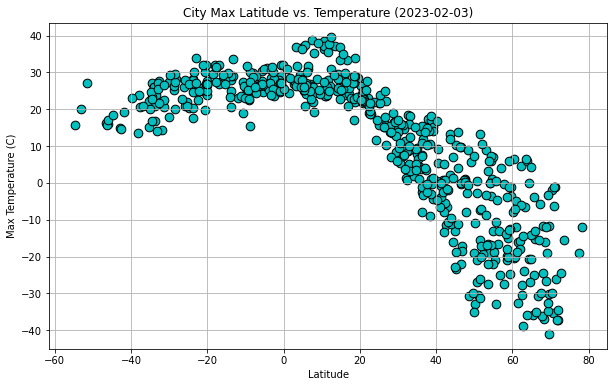

In [10]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolor="black",facecolor="c",s=75)

# Incorporate the other graph properties
ax.set(title= "City Max Latitude vs. Temperature (2023-02-03)",
       ylabel= "Max Temperature (C)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

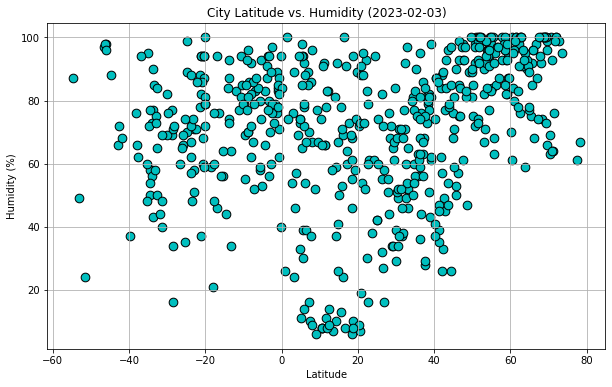

In [11]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black",facecolor="c",s=75)

# Incorporate the other graph properties
ax.set(title= "City Latitude vs. Humidity (2023-02-03)",
       ylabel= "Humidity (%)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

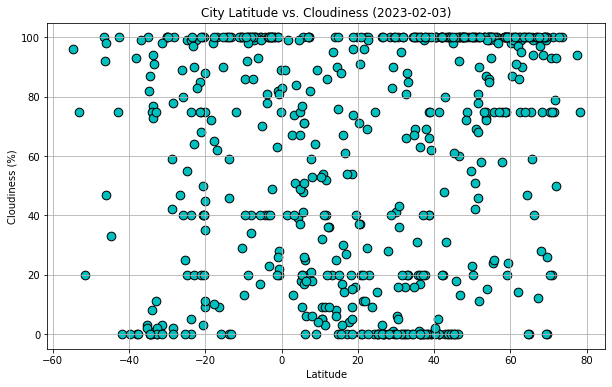

In [12]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolor="black",facecolor="c",s=75)

# Incorporate the other graph properties
ax.set(title= "City Latitude vs. Cloudiness (2023-02-03)",
       ylabel= "Cloudiness (%)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

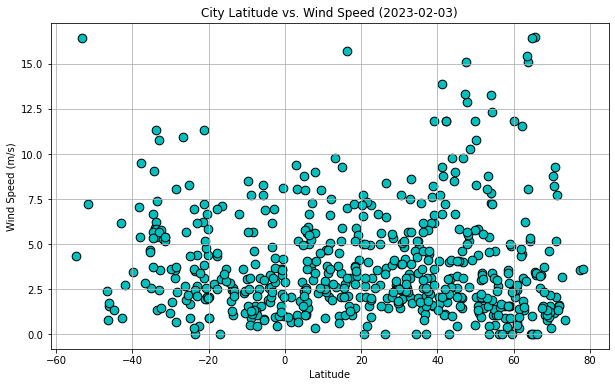

In [13]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black",facecolor="c",s=75)

# Incorporate the other graph properties
ax.set(title= "City Latitude vs. Wind Speed (2023-02-03)",
       ylabel= "Wind Speed (m/s)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def lin_regress(x,y,x_label,y_label,loc):
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    print(f"The r value is {round(plt_r,2)}")
    fit_values = plt_slope * x + plt_int
    fig,ax = plt.subplots(figsize = (10,6))
    ax.scatter(x,y,edgecolor="black",facecolor="c",s=75)
    ax.plot(x,fit_values)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.annotate((f"y = {str(round(plt_slope,2))}x + {str(round(plt_int,2))}"),loc,fontsize=15,color="red")
    plt.show()
    

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san mateo del mar,16.2000,-95.0000,23.86,69,67,15.74,MX,1675437532
3,albany,42.6001,-73.9662,-11.47,49,48,1.79,US,1675437533
6,jamestown,42.0970,-79.2353,-13.23,88,100,7.20,US,1675437257
8,yellowknife,62.4560,-114.3525,-27.71,76,75,3.09,CA,1675437535
9,lasa,46.6166,10.7002,9.65,75,60,3.98,IT,1675437536


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,20.06,49,75,16.46,CL,1675437490
2,hobart,-42.8794,147.3294,14.92,66,75,6.17,AU,1675437533
4,poum,-20.2333,164.0167,27.70,79,88,4.41,NC,1675437534
5,mar del plata,-38.0023,-57.5575,23.86,66,0,5.36,AR,1675437345
7,new norfolk,-42.7826,147.0587,14.72,72,100,0.89,AU,1675437535


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.87


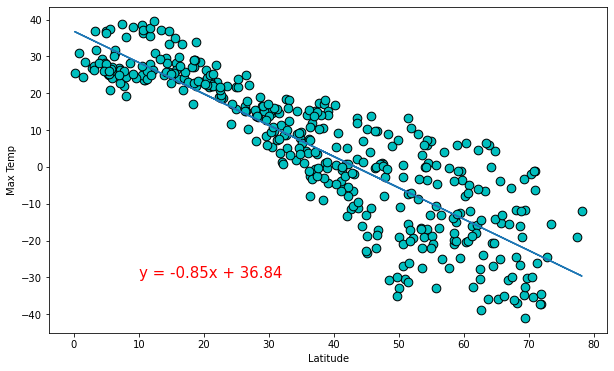

In [43]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",(10,-30))


The r value is 0.54


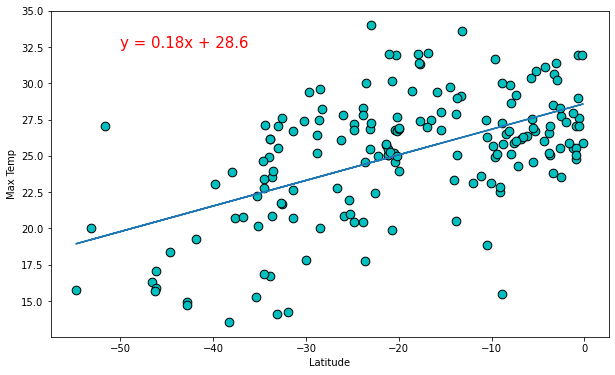

In [44]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",(-50,32.5))

**Discussion about the linear relationship:** The Northern hemisphere shows a very strong inverse relationship between latitude and temperatures, while the Southern hemisphere shows a moderate relationship between latitude and temperatures. This means that the closer one gets to the equator (Latitude = 0), the warmer the temperature. The slope of the Southern hemisphere regression line is, however, shallower than that of the Northern hemisphere. This means that as you get further away from the equator in the Northern hemisphere, it gets colder faster than if you go further away from the equator in the Southern Hemisphere. The relationship between northern hemisphere temperatures is also much stronger than in the Southern Hemisphere, meaning there is more accuracy to the predictions of temperature in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.5


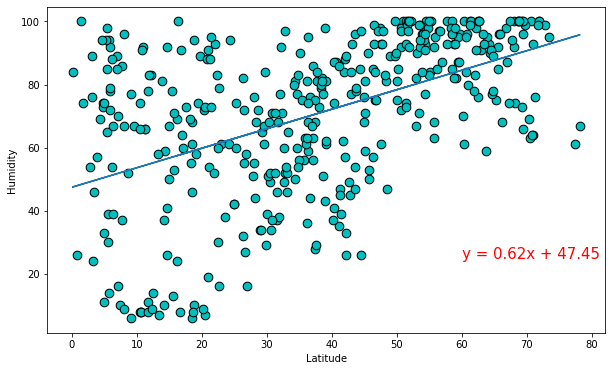

In [45]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",(60,25))

The r value is 0.2


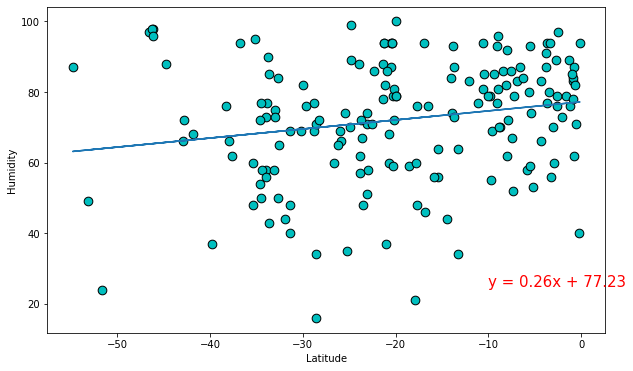

In [46]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",(-10,25))

**Discussion about the linear relationship:** There is a strong positive correlation between latitude and humidity in the Northern hemisphere, while there is a weak-moderate positive correlation for the Southern Hemisphere. The slope of the Southern Hemisphere's regression line is much shallower than that of the Northern Hemisphere. These observations mean that as the latitude gets greater, regardless of hemisphere, the humidity should get higher. While in the Southern Hemisphere, the humidity changes at a slower rate than in the Northern hemisphere, but is also much less predictable. Another interesting note is that just south of the Equator, the humidity is much greater than at / just north of the Equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.37


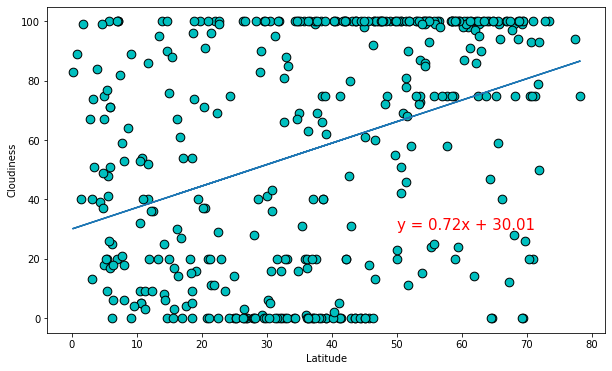

In [52]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(50,30))

The r value is 0.25


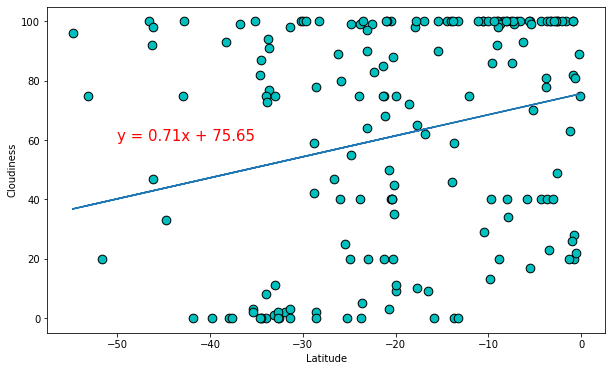

In [54]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(-50,60))

**Discussion about the linear relationship:** There is a weak-moderate positive corrrelation between latitude and cloudiness for both hemispheres. The cloudiness on the southern side of the Equator is much higher than the cloudiness on the northern side of the equator. Latitude does not predict cloudiness with much accuracy, and any predictions should be evaluated with low confidence. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.01


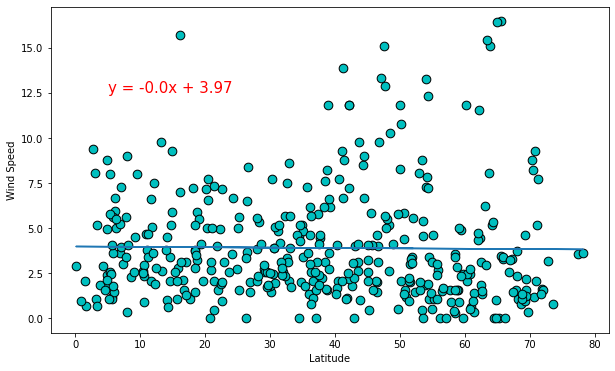

In [49]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(5,12.5))

The r value is -0.28


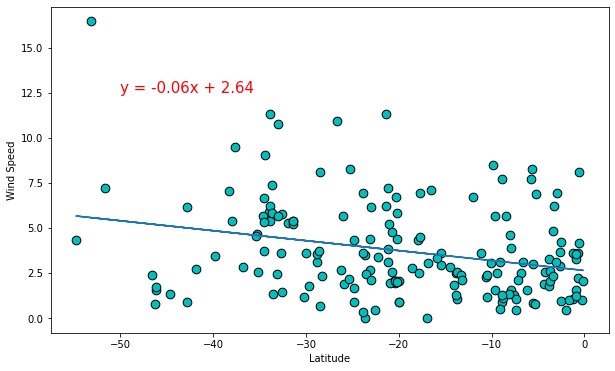

In [50]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(-50,12.5))

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed in the Northern Hemisphere, while there is a weak negative correlation in the Southern Hemisphere. In the Southern Hemisphere, the closer to the equator one moves, the lower the wind speeds. For both hemispheres, the predictive power of latitude for wind speed is extremely low and no predictions should be considered with high confidence. 